**21531117 Burcu KOCA ML Final Projesi**

**Proje Şablonu**
1. Problem Tanımı
* İlgili kütüphanelerin içeri aktarılması
* Veri setinin çalışma ortamına aktarılması
2.Veriyi Anlama (Keşifsel Veri Analizi)
- Sürekli nümerik değişken analizi ve ön işleme stratejileri
- Kategorik değişken analizi ve ön işleme stratejileri
- Kesikli nümerik değişken analizi ve ön işleme stratejileri
3.Veri Ön İşleme Pipeline Kurulması
- Lineer pipeline
- Monoton pipeline
- Ağaç pipeline
4.Makine Öğrenmesi Modellerin Kurulması ve Değerlendirilmesi
- Modellerin kurulması
- Modellerin kıyaslanması
5.Modelin Tamamlanması

## İlgili Paketlerin İçeri Aktarılması

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pre-processing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#model
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#feature-engine
from feature_engine import creation
from feature_engine import discretisation as disc
from feature_engine import encoding as enc
from feature_engine import imputation as imp
from feature_engine import selection as sel
from feature_engine import transformation as tf
from feature_engine import outliers as out

## Veri Setinin İçeri Aktarılması


**MS SubClass** değişkeni nümerik olarak kodlanmış bir kategorik değişken olduğu için veri setini içeri aktarırken, **object** veri tipine çevirip aktarılmıştır.

In [2]:
house = pd.read_csv('//S0134CITFS31/VDI_Wem$/BURCKOCA/Desktop/AmesHousing.csv',
           dtype = {'MS SubClass': 'object'})
house

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# 2) Keşifsel Veri Analizi-EDA

In [3]:
#index değişkenlerin çıkarılması
house.drop(['Order', 'PID'], axis = 1, inplace = True)
house.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#tekrarlı veri kontrolü
house.duplicated().sum()


0

In [5]:
#Değişkenlerin temel veri tipi özellikleri
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   object 
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

Toplam **2930** ev ile ilgili **79** farklı bilgi olduğunu görüyoruz. 



Bundan sonraki bölümlerde farklı değişken tipleri ayrı gruplar halinde incelenecek olup, ön işleme uygulamalarıyla birlikte değişkenlerin satış fiyatları ile ilişkisi incelenecektir.

In [6]:
#Nümerik değişkenlerin tespit edilmesi
house.select_dtypes(['int64', 'float64']).columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [7]:
#nümerik değişken sayısı
len(house.select_dtypes(['int64', 'float64']).columns)

36

In [8]:
#20'nin üzerinde unique değeri olan değişkenler-discrete değerleri tespit edebilmek amacıyla 20 threshold belirlenmiştir.
surekliler = []
for var in house.select_dtypes(['int64', 'float64']).columns:
    if house[var].nunique() >= 20:
        surekliler.append(var)
surekliler

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Yr Blt',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Misc Val',
 'SalePrice']

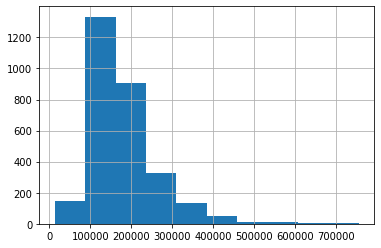

In [9]:
#Satış fiyatı
house['SalePrice'].hist()

Sağa çarpık bir dağılım mevcut. Çoğu ev fiyatının 100k ile 200k dolar arasında yığılma bulunmaktadır.

In [10]:
#Betimsel istatistikler
house[surekliler].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2440.0,69.224590,23.365335,21.0,58.00,68.0,80.00,313.0
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,2907.0,101.896801,179.112611,0.0,0.00,0.0,164.00,1600.0
BsmtFin SF 1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,2929.0,49.722431,169.168476,0.0,0.00,0.0,0.00,1526.0
Bsmt Unf SF,2929.0,559.262547,439.494153,0.0,219.00,466.0,802.00,2336.0
Total Bsmt SF,2929.0,1051.614544,440.615067,0.0,793.00,990.0,1302.00,6110.0
1st Flr SF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0


Bazı değişkenlerin az sayıda eksik veri , bazılarınınsa çok içerdiğini görmekteyiz. 

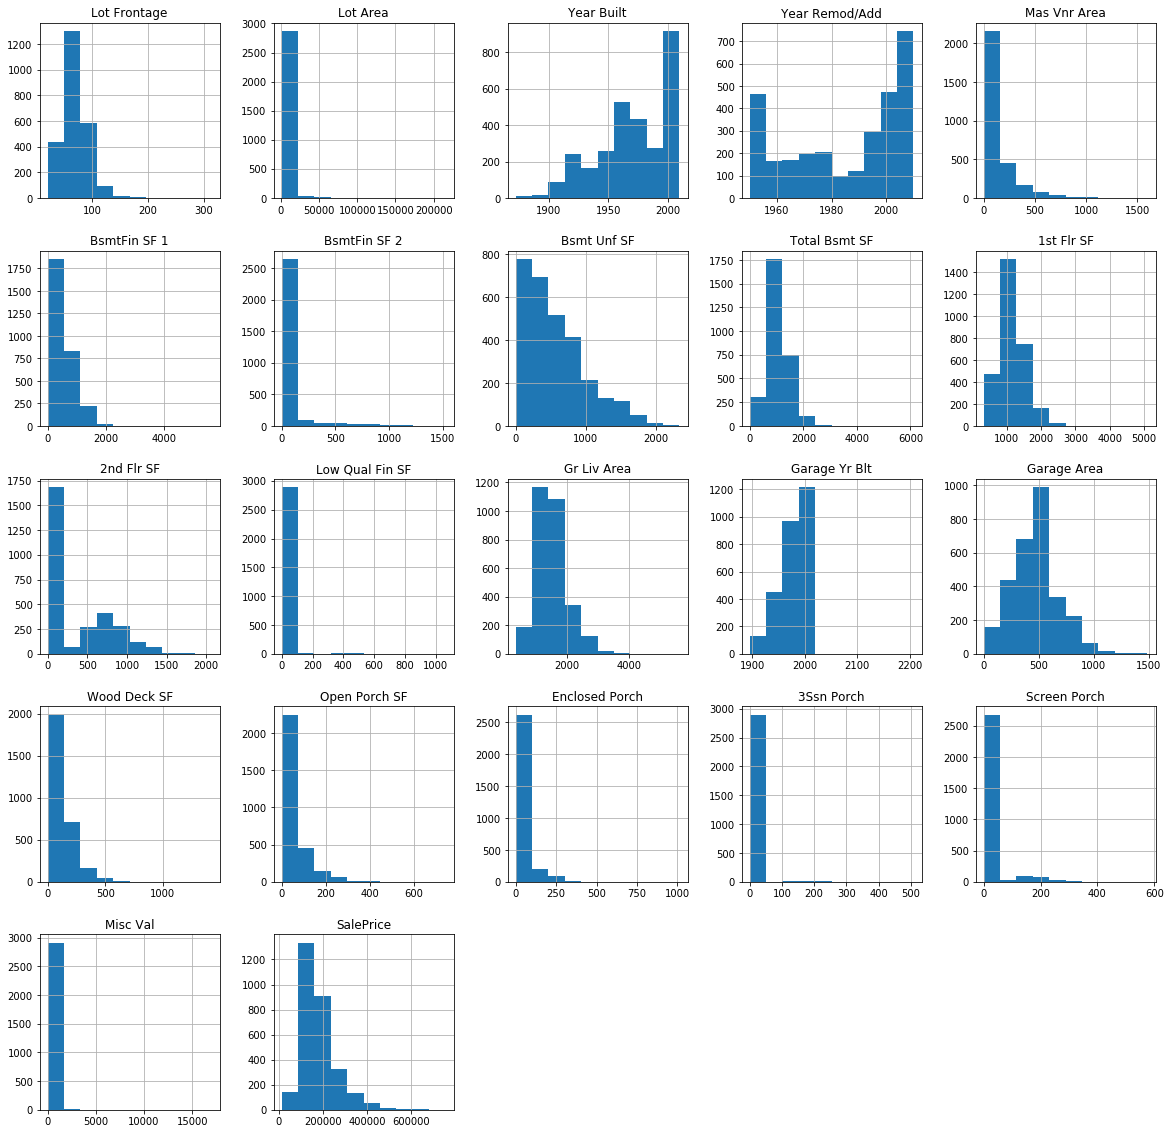

In [11]:

house[surekliler].hist(figsize = (20, 20))
plt.show()


**Misc Val** değişkeninin neredeyse tamamamının 0 değerini alması sebebiyle drop edebiliriz.

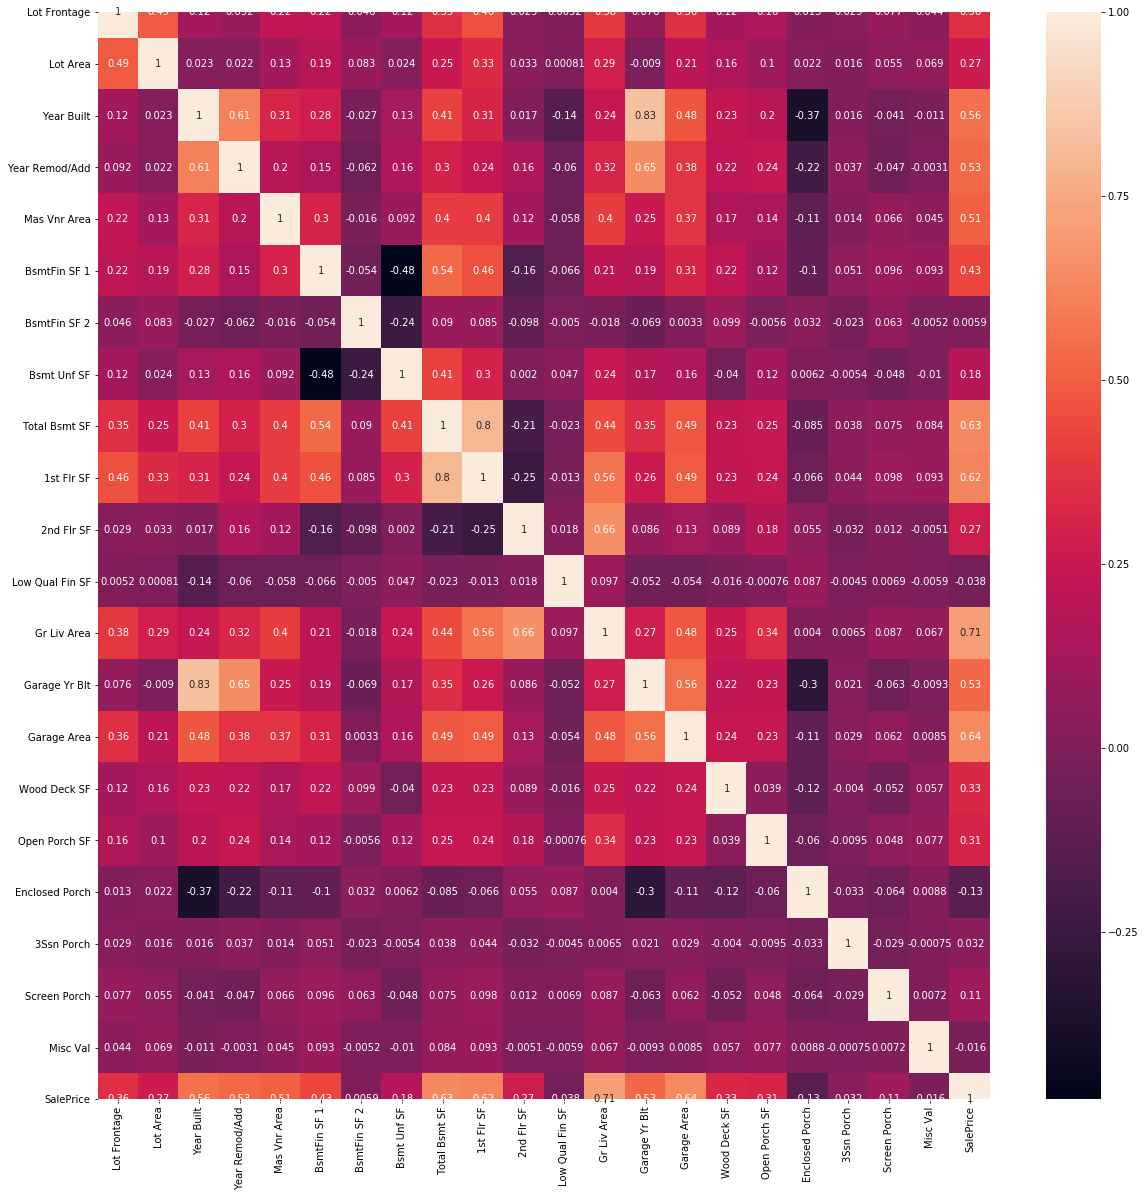

In [12]:
#Korelasyonlar
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house[surekliler].corr(), ax = ax, annot = True)

1. katın alanı ve bodrum katı alanıyla birlikte evin yapıldığı yıl ile garajın yapıldığı yıl arasında yüksek pozitif bir ilişki olduğunu görüyoruz. Ayrıca, toplam zemin katı ve üstü alanıyla (Gr Liv Area), satış fiyatı arasında yüksek pozitif bir ilişki olduğunu söyleyebiliriz.

## Eksik Veriler

In [13]:
#eksik veri kontrolü
house[surekliler].isna().sum()

Lot Frontage       490
Lot Area             0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Yr Blt      159
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Misc Val             0
SalePrice            0
dtype: int64

**Lot Frontage**, **Garage Yr Blt**, ve **Mas Vnr Area** değişkenlerindeki eksik veriler rastgele veya tamamen rastgele kayıp olabilir. Bu kapsamda bu değişkenlere çarpıklıkları nedeniyle **medyan** doldurma yapabiliriz. **Rastgele kayıp olmamaları** ihtimali dahilinde, bu değişkenlere yönelik eksik veri içerdiklerini ifade eden kolon oluşturabiliriz **(missing indicator)**.Tek eksik gözlem içeren satırları ise veri setinden çıkarabiliriz.

In [14]:
#satır bazında eksik verilerin silinmesi
house.dropna(axis = 0, subset = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'],
            inplace = True)
house

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Aykırı Gözlemler

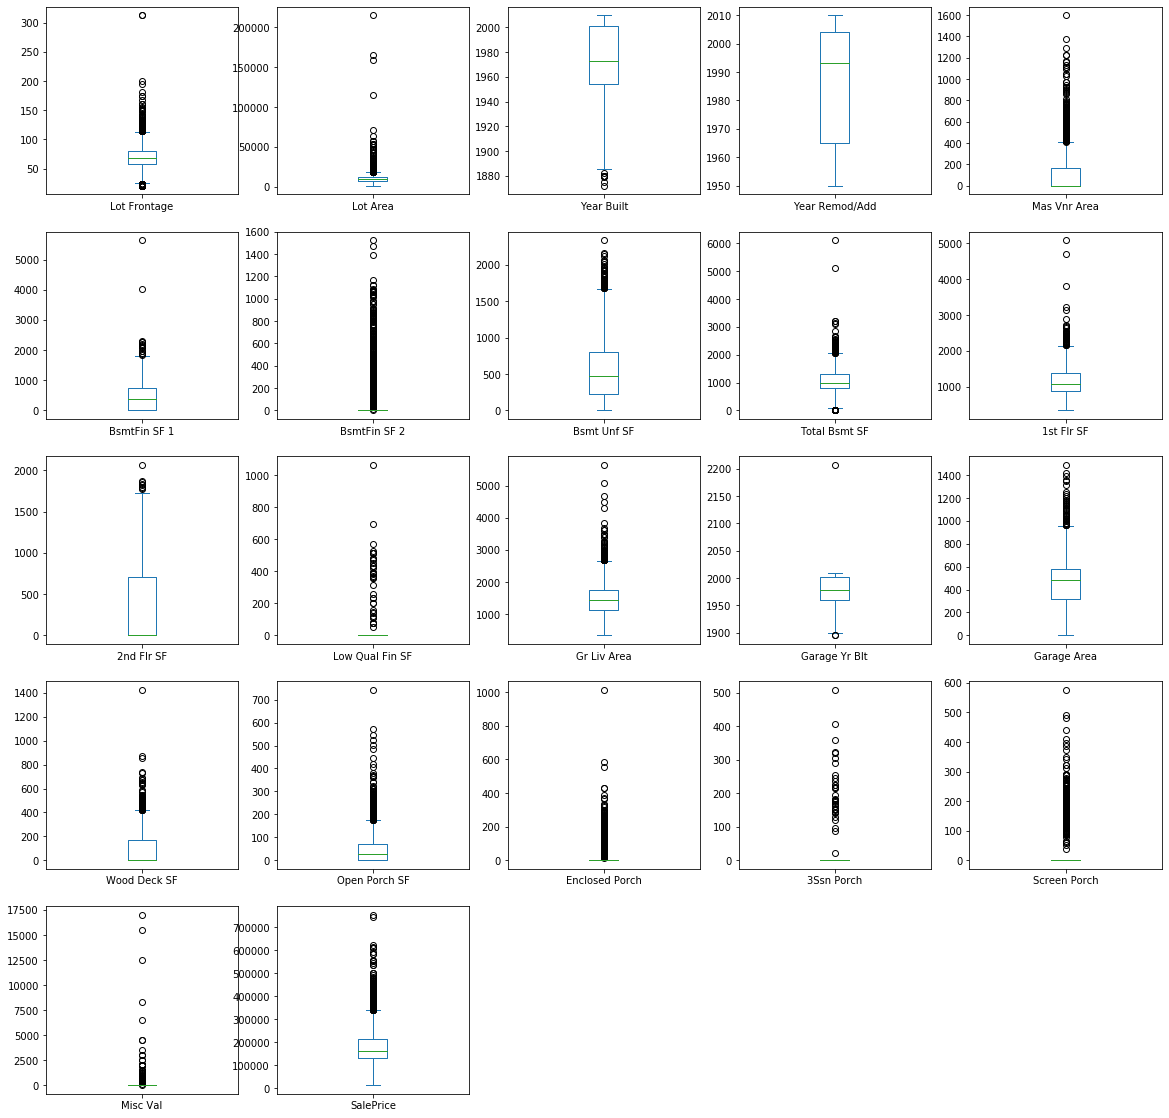

In [15]:
house[surekliler].plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize = (20,20))
plt.show()

## Ön İşleme Stratejileri

## 2.1.1) Lineer pipeline için

**Çıkarılacak değişkenler**

In [16]:
surekli_cikar = ['Misc Val']

**Eksik verilerin doldurulması**

In [17]:
# Medyan değer ile doldurulacaklar
surekli_medyan_doldurma = ['Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt']

# Eksik veri işaretleme
surekli_missing_ind = ['Lot Frontage', 'Garage Yr Blt']

**Aykırı gözlemleri aralıkta tutma**

In [18]:
# IQR
surekli_out = ['Lot Frontage', 'Lot Area', 'Year Built', 'BsmtFin SF 1', 
               'Bsmt Unf SF', 'Gr Liv Area', 'Total Bsmt SF',
               'Garage Yr Blt', 'Garage Area', '1st Flr SF']

**Sürekli değişken kesikleştirme**

In [19]:
#Eşit sıklık kesikleştirme
surekli_kesik = ['Mas Vnr Area', 'BsmtFin SF 2', '2nd Flr SF', 'Low Qual Fin SF', 'Wood Deck SF', 
                 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']

**Kategorik Kodlama**

In [20]:
#One-hot-encoding
surekli_kesik

['Mas Vnr Area',
 'BsmtFin SF 2',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch']

Tüm bu işlemlerin sonunda değişkenlerimizi standardize edip modele hazır hale getirmiş olacağız.

## 2.1.2) Monoton pipeline için

**Çıkarılacak değişkenler**

In [21]:
surekli_cikar = ['Misc Val']

**Eksik verilerin doldurulması**

In [22]:
# Medyan değer ile doldurulacaklar
surekli_medyan_doldurma = ['Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt']

# Eksik veri işaretleme
surekli_missing_ind = ['Lot Frontage', 'Garage Yr Blt']

**Sürekli Değişken Kesikleştirme**

Her sürekli değişken bağımlı değişken ile monoton ilişki içerisinde olmayabilir. Dolayısıyla, sürekli nümerik değişkenleri kesikleştirdikten sonra sıralı tam sayı kodlama ile monoton ilişkileri oluşturabiliriz.

In [23]:
#Eşit sıklık kesikleştirme
surekli_out + surekli_kesik

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Yr Blt',
 'Garage Area',
 '1st Flr SF',
 'Mas Vnr Area',
 'BsmtFin SF 2',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch']

**Kategorik Kodlama**

In [24]:
#Sıralı tam sayı kodlama (ordered label encoding)
surekli_out + surekli_kesik

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Yr Blt',
 'Garage Area',
 '1st Flr SF',
 'Mas Vnr Area',
 'BsmtFin SF 2',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch']

## 2.1.3) Ağaç pipeline

**Çıkarılacak değişkenler**

In [25]:
surekli_cikar = ['Misc Val']

**Eksik verilerin doldurulması**

In [26]:
# Medyan değer ile doldurulacaklar
surekli_medyan_doldurma = ['Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt']

# Eksik veri işaretleme
surekli_missing_ind = ['Lot Frontage', 'Garage Yr Blt']

**Sürekli Değişken Kesikleştirme**

Ağaç tabanlı modellerin performansını arttırabilmek amacıyla karar ağacı kesikleştirme yaptıktan sonra, yine karar ağacı ile kategorik kodlama yapacağız.

In [27]:
#Ağaç kesikleştirme
surekli_out + surekli_kesik

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Yr Blt',
 'Garage Area',
 '1st Flr SF',
 'Mas Vnr Area',
 'BsmtFin SF 2',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch']

**Kategorik Kodlama**

In [28]:
#Ağaç kodlama
surekli_out + surekli_kesik

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Yr Blt',
 'Garage Area',
 '1st Flr SF',
 'Mas Vnr Area',
 'BsmtFin SF 2',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch']

## 2.2) Kesikli Nümerik Değişken Analizi

In [29]:
#Nümerik değişkenlerin tespit edilmesi
house.select_dtypes(['int64', 'float64']).columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [30]:
# nümerik değişken sayısı
len(house.select_dtypes(['int64', 'float64']).columns)

36

In [31]:
#20'nin altında unique değeri olan değişkenler
kesikliler = [var for var in house.select_dtypes(['int64', 'float64']).columns if house[var].nunique() < 20]
kesikliler

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Pool Area',
 'Mo Sold',
 'Yr Sold']

In [32]:
#Betimsel istatistikler
house[kesikliler].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2928.0,6.095970,1.410831,1.0,5.0,6.0,7.0,10.0
Overall Cond,2928.0,5.562500,1.111570,1.0,5.0,5.0,6.0,9.0
Bsmt Full Bath,2927.0,0.431500,0.524849,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2927.0,0.061155,0.245293,0.0,0.0,0.0,0.0,2.0
Full Bath,2928.0,1.566598,0.552972,0.0,1.0,2.0,2.0,4.0
Half Bath,2928.0,0.379781,0.502703,0.0,0.0,0.0,1.0,2.0
Bedroom AbvGr,2928.0,2.854508,0.827859,0.0,2.0,3.0,3.0,8.0
Kitchen AbvGr,2928.0,1.044399,0.214146,0.0,1.0,1.0,1.0,3.0
TotRms AbvGrd,2928.0,6.443989,1.572832,2.0,5.0,6.0,7.0,15.0
Fireplaces,2928.0,0.599727,0.647953,0.0,0.0,1.0,1.0,4.0


Çeyrekliklere bakacak olursak bu değişkenlerin kesikli, yani kategorik değişkenler olabileceğini söyleyebiliriz. Ayrıca havuz alanı değişkeninin %75 ve daha azı 0 olduğu için kesikleştirme yaptıktan sonra kategorik kodlama yapabiliriz. Birer eksik gözlem bulunan bodrum katı lavabo ve tuvalet sayıları değişkenlerinin eksik gözlem bulunan satırlarını veri setinden çıkartabiliriz.

In [33]:
#Eksik gözlem bulunan satırların çıkartılması
house.dropna(axis = 0, subset = ['Bsmt Full Bath', 'Bsmt Half Bath'], inplace = True)
house

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Eksik Veriler

In [34]:
house[kesikliler].isna().sum()

Overall Qual      0
Overall Cond      0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Cars       0
Pool Area         0
Mo Sold           0
Yr Sold           0
dtype: int64

## Değişken Sıklıkları ve Satış Fiyatları İlişkisi

In [35]:
#Kategori oranları ve kategori başına düşen ev fiyatları ortalamaları
def calculate_mean_target_per_category(df, var):

    # kategori başına düşen ev sayısı
    temp_df = pd.Series(df[var].value_counts() / len(df)).reset_index()
    temp_df.columns = [var, 'ev_oran']

    # kategori başına düşen ev fiyatları ortalaması
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df


In [36]:

calculate_mean_target_per_category(house, 'Garage Cars')

,Garage Cars,ev_oran,SalePrice
0,2.0,0.547318,183498.970662
1,1.0,0.265460,127329.543115
2,3.0,0.127776,310304.622995
3,0.0,0.053639,104949.254777
4,4.0,0.005466,228748.687500
5,5.0,0.000342,126500.000000


In [37]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df['ev_oran'], color='lightgrey')
    ax2.plot(df.index, df['SalePrice'], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('Kategori başına ev oranı')
    ax.set_xlabel(var)
    ax2.set_ylabel('Kategori başına düşen ev fiyatı ortalamaları')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


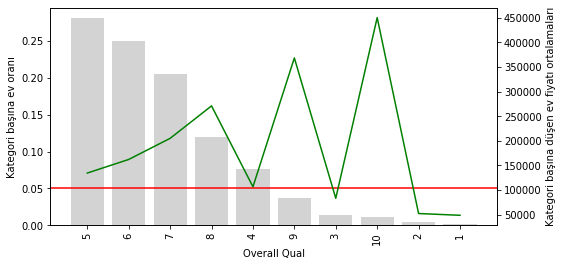

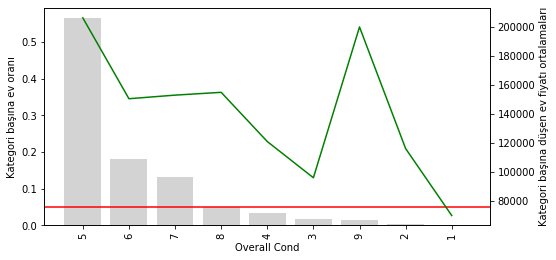

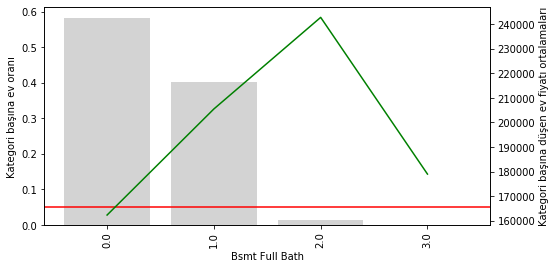

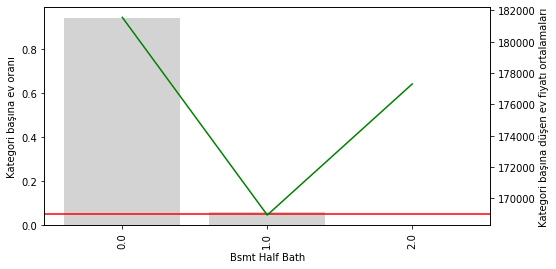

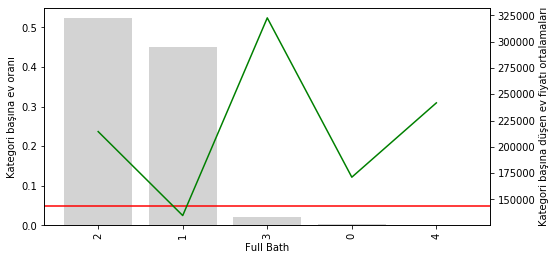

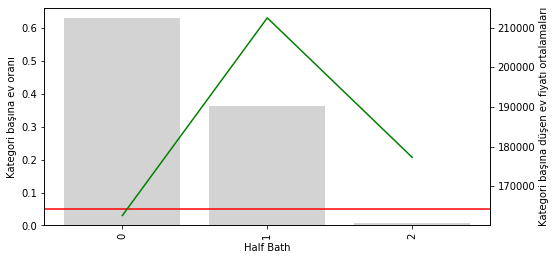

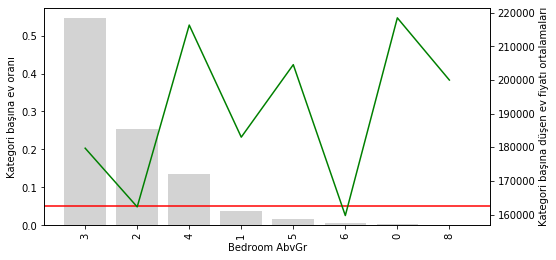

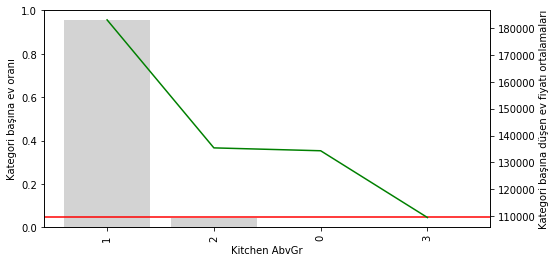

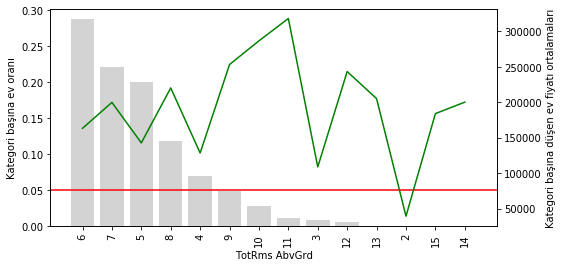

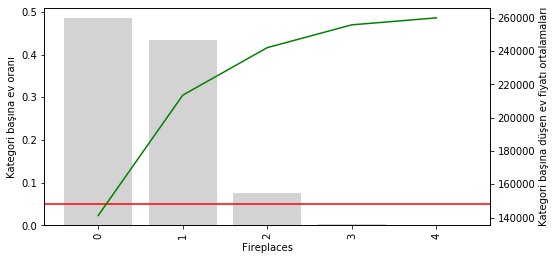

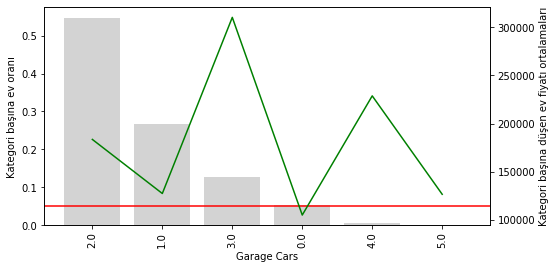

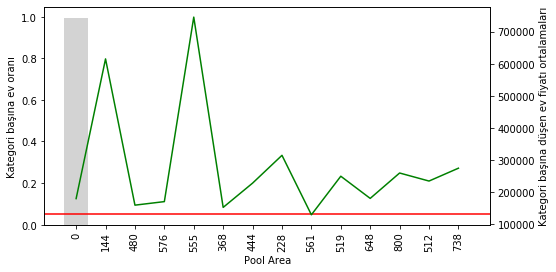

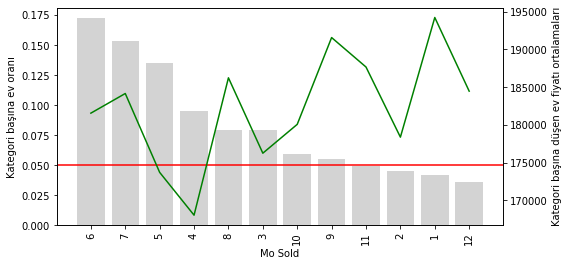

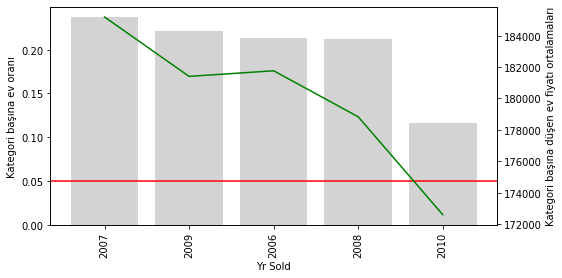

In [38]:
for col in kesikliler:        
    temp_df = calculate_mean_target_per_category(house, col)
    plot_categories(temp_df, col)

Çoğu değişken, kategori sıklıkları bakımından oldukça az sayıda olduklarından train-test ayrımında belli kategorilerin sadece train ya da test setinde yer alabileceği ihtimaline karşın kategori birleştirme işlemi uygulaması yapılmıştır. Burada kategori birleşimi için bazı değişkenlerin sıklığının yetmemesi sebebiyle **0.05 oran eşik değerini 0.1'e** yükseltmek daha sağlıklı olacaktır.

Ayrıca, **havuz alanı** değişkeninin neredeyse tamamamının 0 değeri alması sebebiyle satış fiyatıyla ilgili herhangi bir bilgi taşımayacağından, veri setimizden **çıkarabiliriz**.


**Half Bath** (küçük banyo/lavabo) değişkenini küçük banyo var ya da yok olarak kodlayabiliriz.-sıklık az olduğu için

In [39]:
house['Half Bath'] = np.where(house['Half Bath'] == 0, 0, 1)
house['Half Bath'].value_counts()

0    1841
1    1086
Name: Half Bath, dtype: int64

## Ön İşleme Stratejileri

## 2.2.1) Lineer pipeline için

**Çıkarılacak değişkenler**

In [40]:
kesikli_cikar = ['Pool Area', 'Yr Sold']

**Eksik verilerin doldurulması**

In [41]:
#Herhangi bir eksik veri bulunmamaktadır
house[kesikliler].isna().sum()

Overall Qual      0
Overall Cond      0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Cars       0
Pool Area         0
Mo Sold           0
Yr Sold           0
dtype: int64

**kategori birleşimi**

In [42]:
#Rare birleştirme: 0.1 eşik değeri ile
kesikli_rare = [var for var in kesikliler if var not in kesikli_cikar]
kesikli_rare.remove('Half Bath')
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

**Kategorik kodlama**

In [43]:
#One-hot-encoding
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

## 2.2.2) Monoton pipeline için

**Çıkarılacak değişkenler**

In [44]:
kesikli_cikar = ['Pool Area', 'Yr Sold']

**Eksik verilerin doldurulması**

In [45]:
#Herhangi bir eksik veri bulunmamaktadır
house[kesikliler].isna().sum()

Overall Qual      0
Overall Cond      0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Cars       0
Pool Area         0
Mo Sold           0
Yr Sold           0
dtype: int64

**kategori birleşimi**

In [46]:
#Rare birleştirme
kesikli_rare = [var for var in kesikliler if var not in kesikli_cikar]
kesikli_rare.remove('Half Bath')
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

**Kategorik kodlama**

In [47]:
#Sıralı tam sayı kodlama (ordered label encoding)
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

## 2.2.3) Ağaç pipeline

**Çıkarılacak değişkenler**

In [48]:
kesikli_cikar = ['Pool Area', 'Yr Sold']

**Eksik verilerin doldurulması**

In [49]:
house[kesikliler].isna().sum()

Overall Qual      0
Overall Cond      0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Cars       0
Pool Area         0
Mo Sold           0
Yr Sold           0
dtype: int64

**kategori birleşimi**

In [50]:
#Rare birleştirme
kesikli_rare = [var for var in kesikliler if var not in kesikli_cikar]
kesikli_rare.remove('Half Bath')
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

**Kategorik kodlama**

In [51]:
#Ağaç kodlama
kesikli_rare

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold']

## 2.3) Kategorik Değişken Analizi

In [52]:
#Kategorik değişkenlerin tespit edilmesi
house.select_dtypes(['object']).columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [53]:

len(house.select_dtypes(['object']).columns)

44

In [54]:
#Kategorik değişkenler
kategorikler = house.select_dtypes(['object']).columns
kategorikler

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

## Eksik Veriler

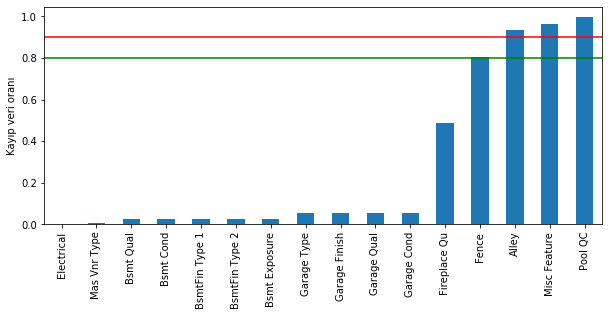

In [55]:
#Oran bakımından eksik verilerin yoğun olduğu değişkenler 
tmp = house.select_dtypes(['object']).isna().sum() / len(house)
tmp[tmp.index[tmp > 0]].sort_values().plot.bar(figsize = (10, 4))
plt.ylabel('Kayıp veri oranı')
plt.axhline(y = 0.90, color = 'r', linestyle = '-') 
plt.axhline(y = 0.80, color = 'g', linestyle = '-')

**Alley** (ara yol tipi), **Misc Feature** (diğer değişkenlerde belirtilmeyen başka özellikler) ve **Pool QC** (havuz kalitesi) değişkenlerinin %90 üzerinde eksik veri olduğundan modelimizden bu değişkenleri çıkartabiliriz.

**Fence** (çit kalitesi) değişkeninin, mülkün çitleri olmaması nedeniyle eksik gelmiş ihtimalini göz önüne alarak çitli ve çitsiz evlerin satış fiyatı ilişkilerini inceleyelim.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


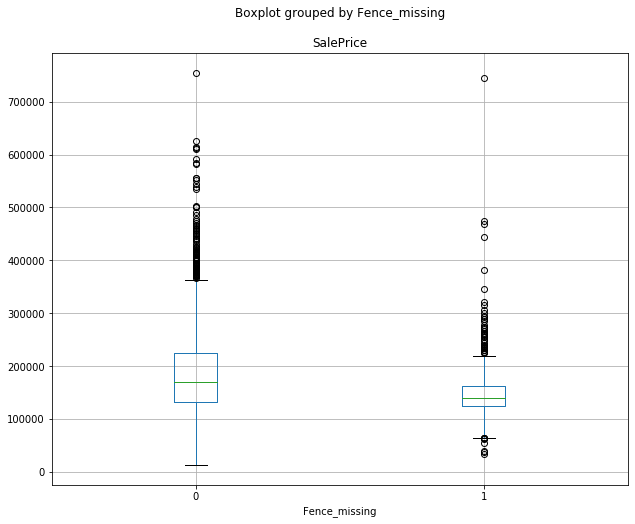

In [56]:
# Çit olan evlerle, olmayan evlerin kıyaslanması
tmp = house.copy()
tmp['Fence_missing'] = np.where(house['Fence'].isna(), 0, 1)
tmp.boxplot(column = 'SalePrice', by = 'Fence_missing', figsize = (10,8))
plt.show()

Çit olmayan evlerin ortanca fiyatı daha yüksek olduğundan, satış fiyatları tahmine katkıda bulunabilir. Kayıp gözlemleri, **"missing" kategorisi ile doldurabiliriz.**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


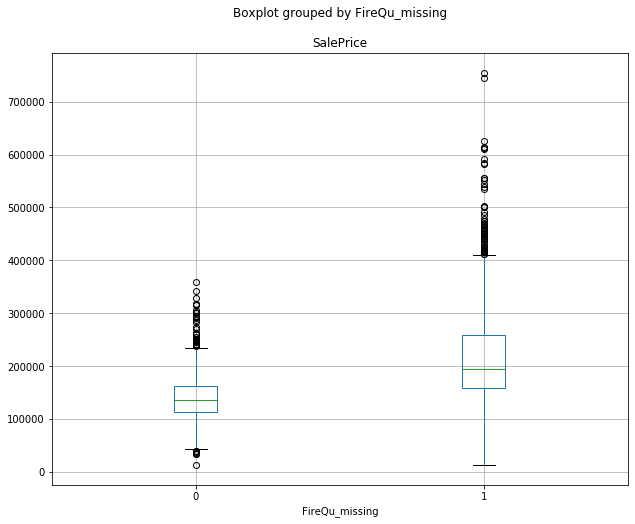

In [57]:
# Şöminesi olan evlerle, olmayan evlerin kıyaslanması
tmp = house.copy()
tmp['FireQu_missing'] = np.where(house['Fireplace Qu'].isna(), 0, 1)
tmp.boxplot(column = 'SalePrice', by = 'FireQu_missing', figsize = (10,8))
plt.show()

Ortancaları kıyasladığımızda şöminesi olan evlerin olmayanlara göre ortanca fiyatlarının daha yüksek olduğunu görebiliyoruz. Kayıp gözlemleri **"missing"** kategorisi ile doldurabiliriz.

Garaj ile ilgili değişkenlerde benzer oranlarda eksik gözlemler var gibi gözüktüğünden, oranlar eşit mi diye inceleyelim. Eğer eşitse, bu evler belli tipte evleri temsil ediyor olabilirler. Bu durumda **"missing"** kategorisi ile doldurma yapabiliriz.

In [58]:
#Garaj değişkenleri kayıp gözlem oranları
for var in [var for var in kategorikler if 'Garage' in var]:
    print(house[var].isna().sum() / len(house))

0.05363853775196447
0.05398018448923813
0.05398018448923813
0.05398018448923813


Aynı analizi bodrum katı ile ilgili değişkenler için de yapabiliriz.

In [59]:
#Bodrum katı değişkenleri kayıp gözlem oranları
for var in [var for var in kategorikler if 'Bsmt' in var]:
    print(house[var].isna().sum() / len(house))

0.026648445507345405
0.026648445507345405
0.02767338571916638
0.026648445507345405
0.026990092244619065


Garaj ve bodrum ile ilişkili değişkenleri de **"missing"** kategorisi ile doldurabiliriz.

**Mas Vnr Type** (kagir kaplama tipi) ile **Electrical** (elektrik altyapı tipi) değişkenlerinin çok az oranda kayıp gözlemi olması nedeniyle, satır bazında çıkarma ya da en çok tekrar eden kategori ile doldurma işlemi yapabiliriz. Bilgi kaybını önlemek amacıyla en çok tekrar eden kategori (mod) ile doldurma yapabiliriz.

## Değişken Sıklıkları ve Satış Fiyatları İlişkisi

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


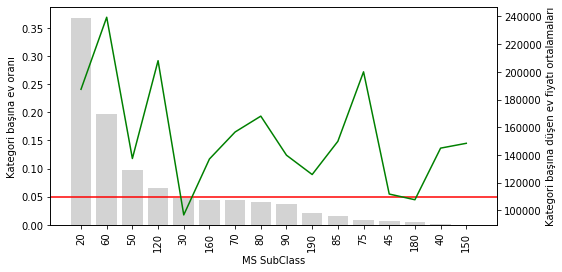

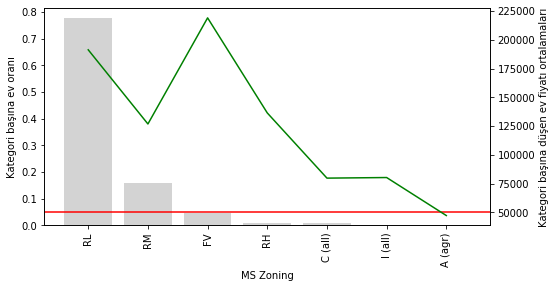

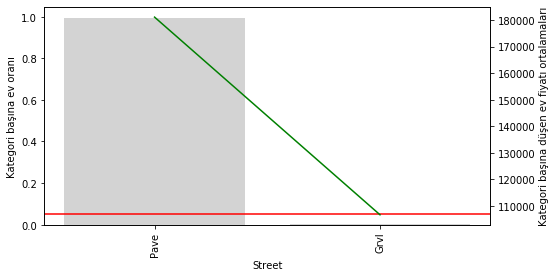

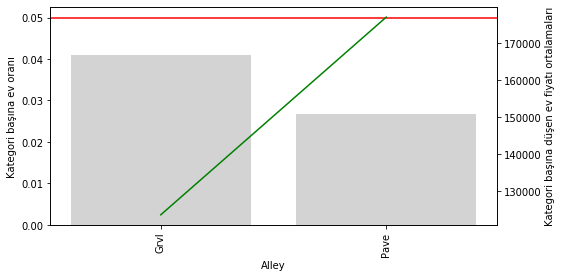

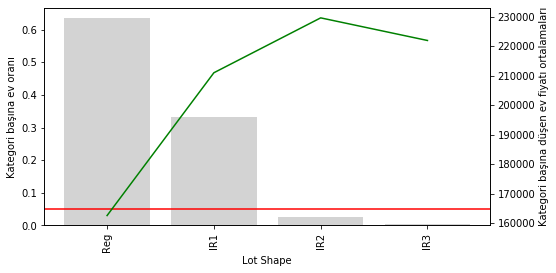

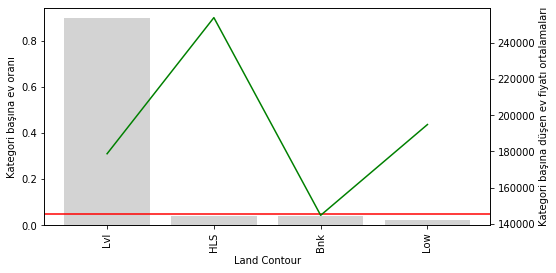

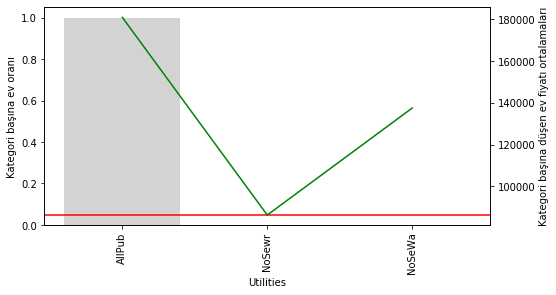

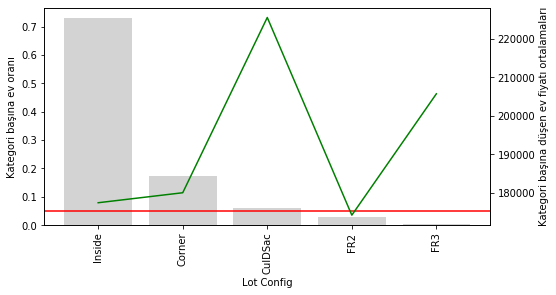

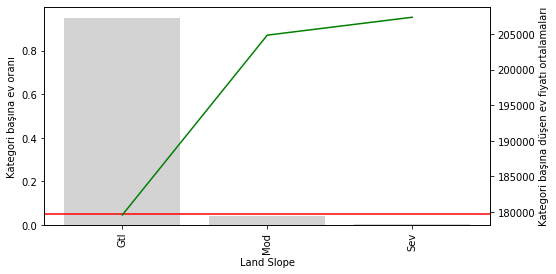

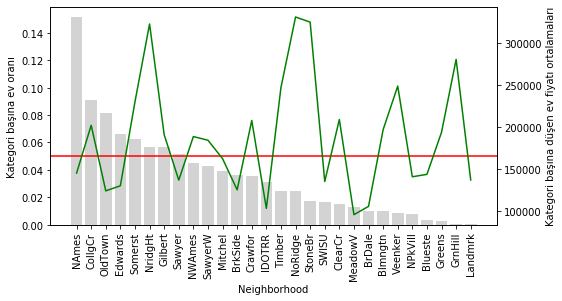

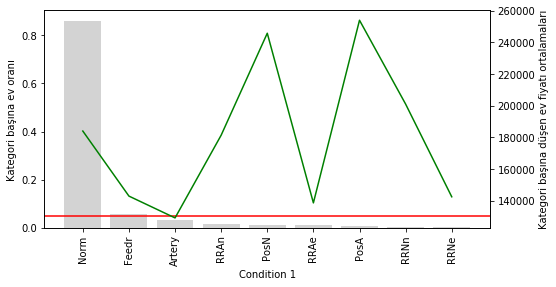

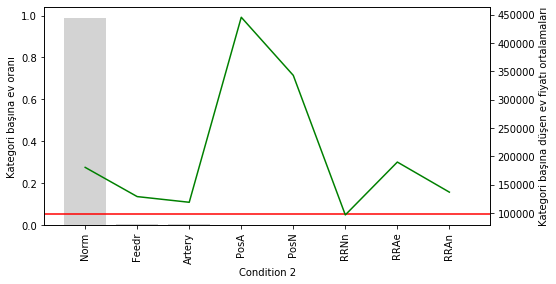

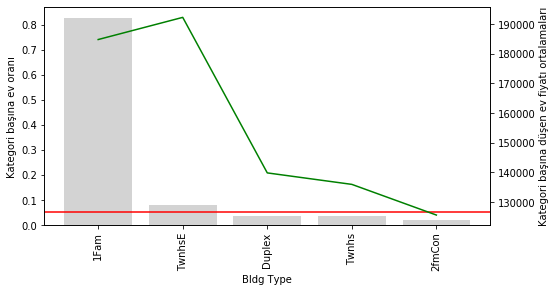

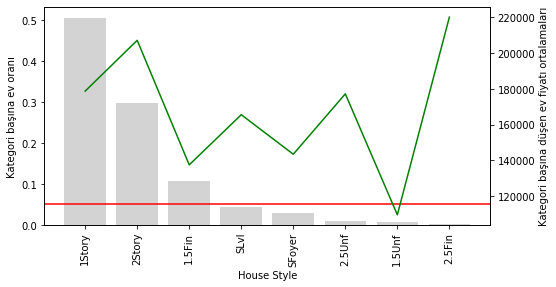

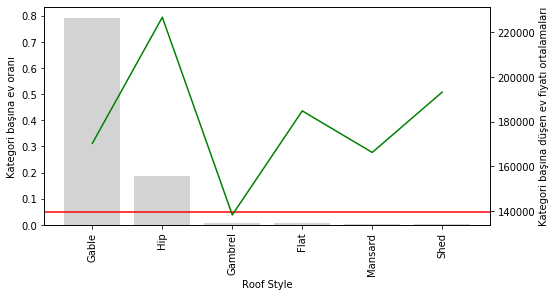

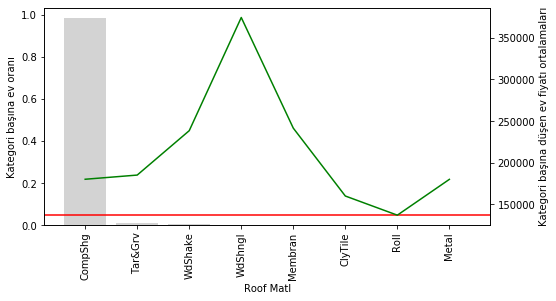

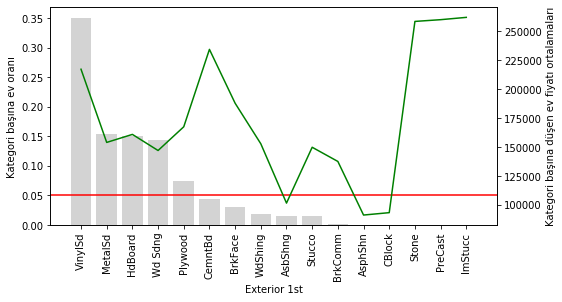

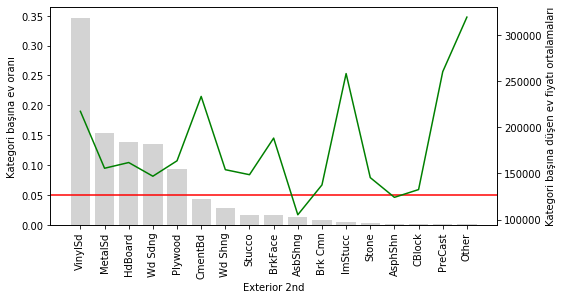

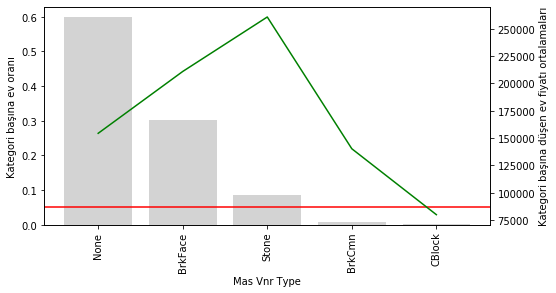

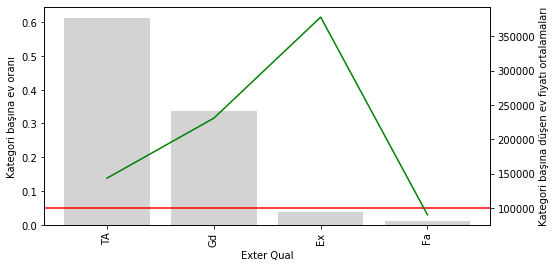

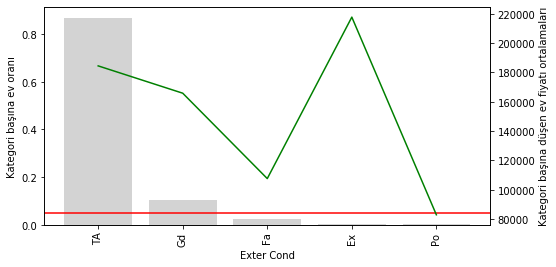

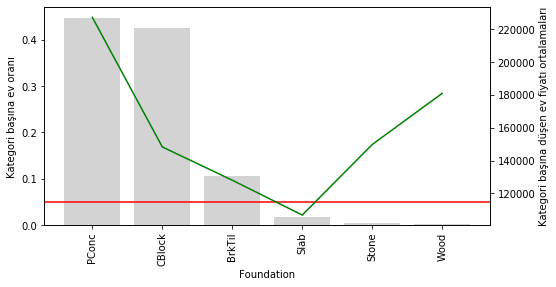

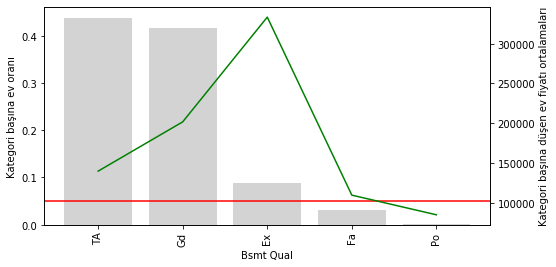

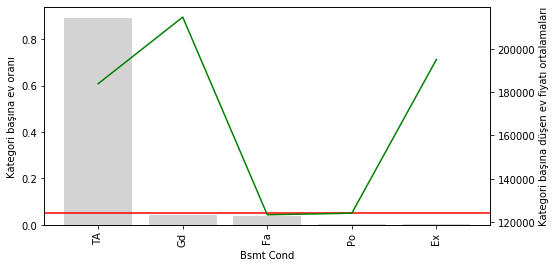

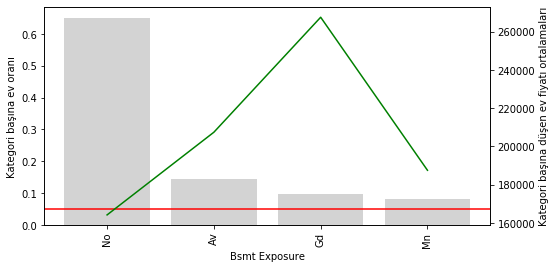

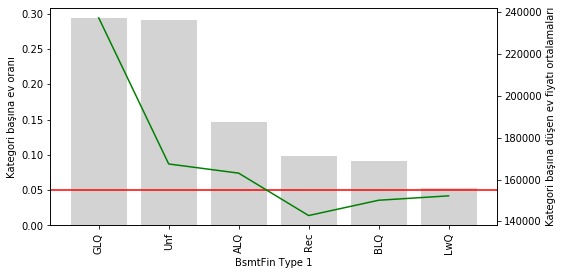

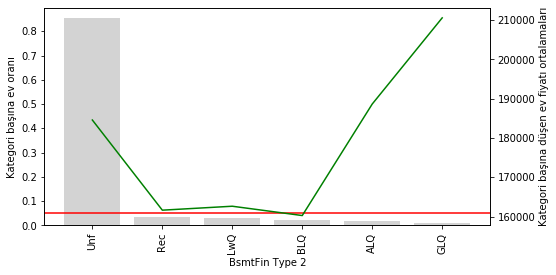

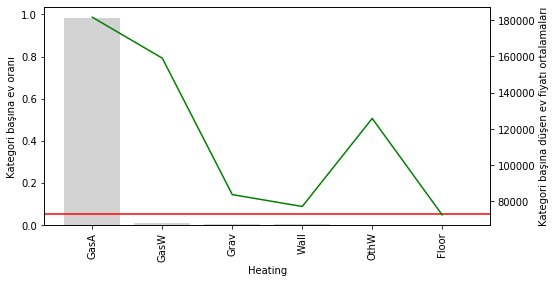

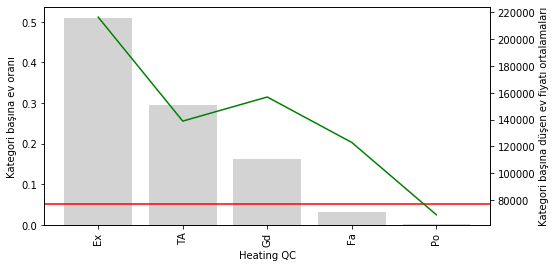

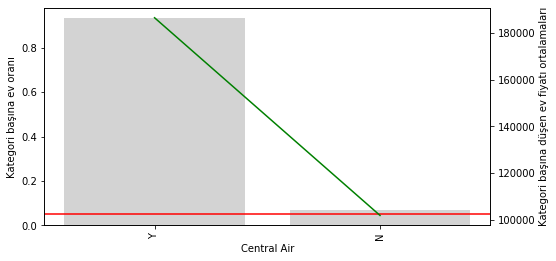

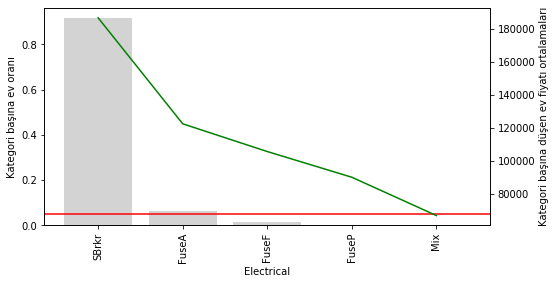

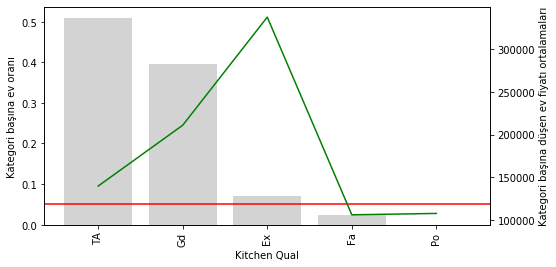

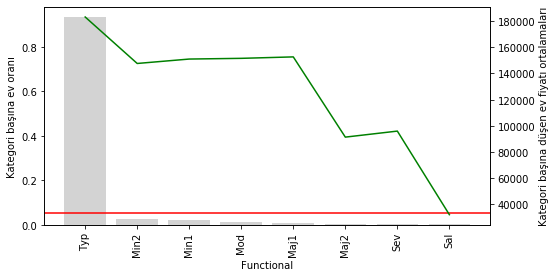

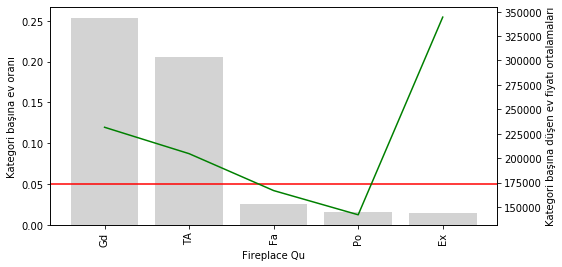

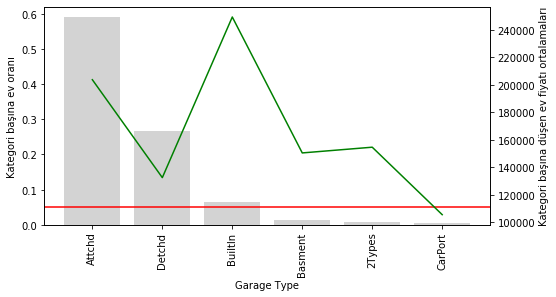

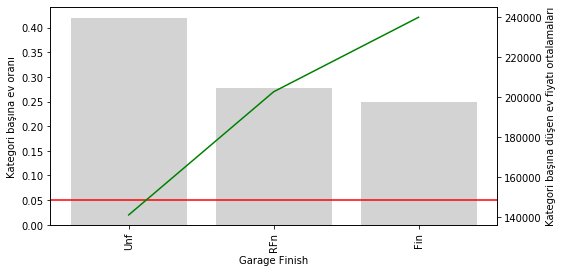

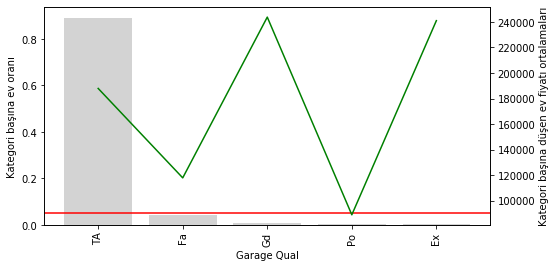

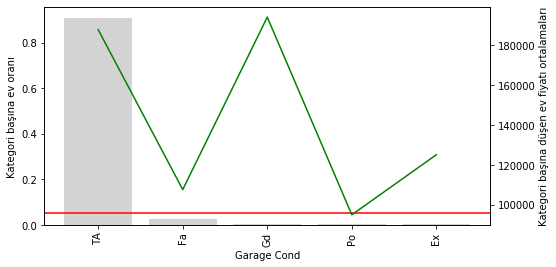

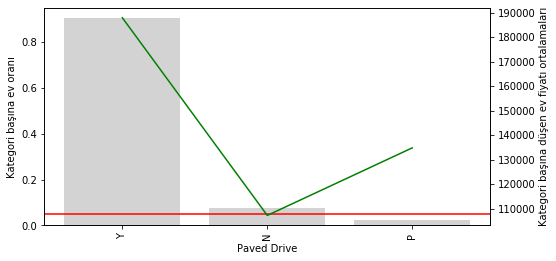

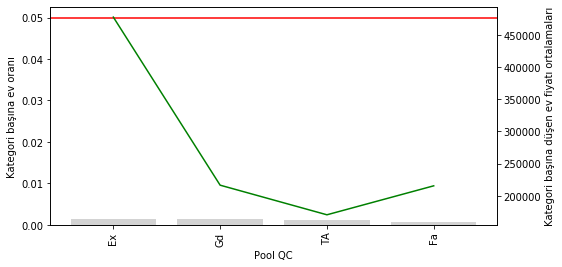

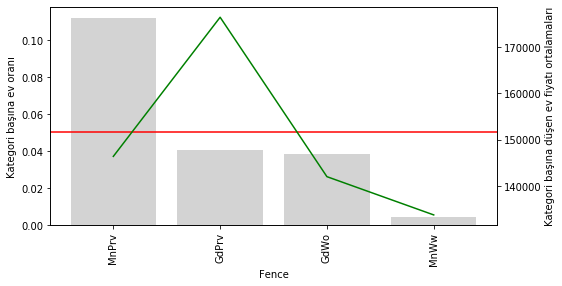

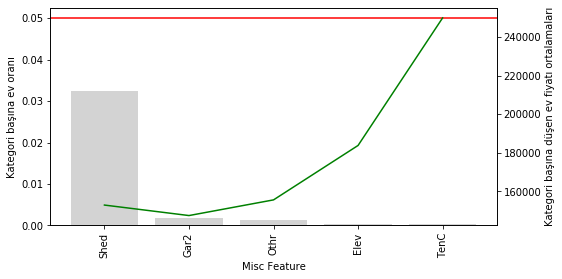

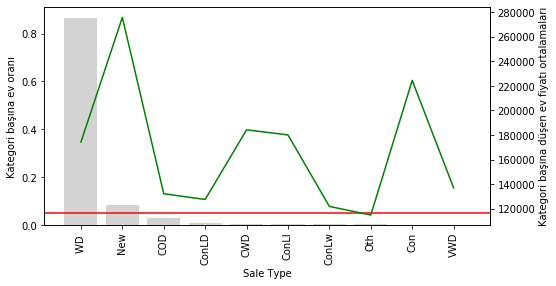

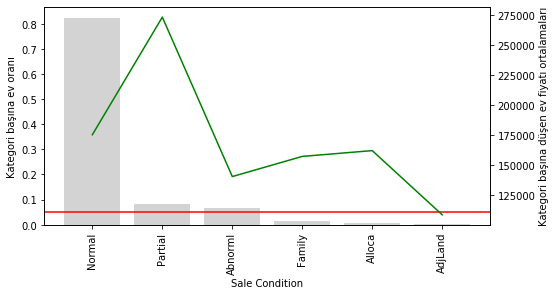

In [60]:
#Tüm kategorik değişkenlerin sıklık ve satış fiyatı ilişkisi görselleştirmeleri
for col in kategorikler:        
    temp_df = calculate_mean_target_per_category(house, col)
    plot_categories(temp_df, col)

**Street** (mülke gidiş yolunun tipi), **Utilities** (evde mevcut olan genel özellikler), **Condition 2** (evin bazı bölgelere uzaklığı), **Roof Matl** (çatının malzeme tipi) ve **Heating** (ısıtma sistemi tipi) değişkenlerinde tek bir kategorinin baskın olması nedeniyle satış fiyatıyla ilgili herhangi bir bilgi elde edilememektedir. Bu kapsamda, bu değişkenler çıkarılmıştır.


In [61]:
kategorik_cikar = ['Alley', 'Misc Feature', 'Pool QC', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating']

**Eksik verilerin doldurulması**

In [62]:
# Missing kategorisi ile doldurulacaklar
kategorik_missing_doldurma = ['Fence', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                              'Garage Qual', 'Garage Cond','Bsmt Qual', 'Bsmt Cond', 
                              'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
# Mod ile doldurulacaklar
kategorik_mod = ['Mas Vnr Type', 'Electrical']

**Ender kategori birleşimi**

In [63]:
#Rare gruplama: 0.05 eşik değeri ile
kategorik_rare = [var for var in kategorikler if var not in kategorik_cikar]

**Kategorik kodlama**

In [64]:
#One-hot-encoding
kategorik_rare

['MS SubClass',
 'MS Zoning',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

## 2.3.2) Monoton pipeline için

**Çıkarılacak değişkenler**

In [65]:
kategorik_cikar = ['Alley', 'Misc Feature', 'Pool QC', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating']

**Eksik verilerin doldurulması**

In [66]:
# Missing kategorisi ile doldurulacaklar
kategorik_missing_doldurma = ['Fence', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                              'Garage Qual', 'Garage Cond','Bsmt Qual', 'Bsmt Cond', 
                              'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
# Mod ile doldurulacaklar
kategorik_mod = ['Mas Vnr Type', 'Electrical']

**Ender kategori birleşimi**

In [67]:
#Rare gruplama: 0.05 eşik değeri ile
kategorik_rare = [var for var in kategorikler if var not in kategorik_cikar]

**Kategorik kodlama**

In [68]:
#Sıralı tam sayı kodlama (ordered label encoding)
kategorik_rare

['MS SubClass',
 'MS Zoning',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

## 2.3.3) Ağaç pipeline için

**Çıkarılacak değişkenler**

In [69]:
kategorik_cikar = ['Alley', 'Misc Feature', 'Pool QC', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating']

**Eksik verilerin doldurulması**

In [70]:
# Missing kategorisi ile doldurulacaklar
kategorik_missing_doldurma = ['Fence', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                              'Garage Qual', 'Garage Cond','Bsmt Qual', 'Bsmt Cond', 
                              'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
# Mod ile doldurulacaklar
kategorik_mod = ['Mas Vnr Type', 'Electrical']

**Ender kategori birleşimi**

In [71]:
#Rare gruplama: 0.05 eşik değeri ile
kategorik_rare = [var for var in kategorikler if var not in kategorik_cikar]

**Kategorik kodlama**

In [72]:
#Ağaç kodlama
kategorik_rare

['MS SubClass',
 'MS Zoning',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

# 3) Veri Ön İşleme Pipeline'ları

In [73]:
#Kesikli değişkenleri object veri tipine dönüştürme
house[kesikliler] = house[kesikliler].astype('object')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(house.drop('SalePrice', axis = 1), house['SalePrice'], 
                                                    test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((2341, 79), (586, 79))

## 3.1) Lineer Pipeline

In [75]:
lineer_pipeline = Pipeline([
    
    #==Çıkarılacak değişkenler==
    ('cikan_degiskenler', sel.DropFeatures(
        features_to_drop = surekli_cikar + kesikli_cikar + kategorik_cikar
    )),
    
  
    
    #Eksik verilerin işaretlenmesi
    ('missing_isaret', imp.AddMissingIndicator(
        variables = surekli_missing_ind
    )),
    
    #Medyan doldurma
    ('medyan_doldurma', imp.MeanMedianImputer(
        imputation_method = 'median', variables = surekli_medyan_doldurma
    )),
    
    
    #Kategorik "missing" ile doldurma
    ('missing_doldurma', imp.CategoricalImputer(
        imputation_method='missing', variables=kategorik_missing_doldurma, return_object=True
    )),
    
    #Mod ile doldurma
    ('frequent', imp.CategoricalImputer(
        imputation_method='frequent', variables=kategorik_mod, return_object=True
    )),
    
    #==Aykırı değerler==
    #Aralıkta tutma
    ('aykiri_deger', out.Winsorizer(
        capping_method = 'iqr', variables = surekli_out                
    )),
    
    #==Kesikleştirme==
    ('kesiklestirme', disc.EqualFrequencyDiscretiser(
        variables = surekli_kesik, return_object=True
    )),
    
    #== kategori gruplama==
    #Kesikliler için 0.1
    ('ender_kesikli', enc.RareLabelEncoder(
        tol = 0.1, n_categories = 1, variables = kesikli_rare
    )),
    
    #Diğerleri için 0.05
    ('ender_diger', enc.RareLabelEncoder(
        tol = 0.05, n_categories = 0, variables = kategorik_rare + surekli_kesik
    )),
    
    
    #==Kategorik veri kodlama==
    ('encoder', enc.OneHotEncoder(
    drop_last = True, variables = surekli_kesik + kesikli_rare + kategorik_rare
    )),
    
    
    #==Değişken dönüşümü==
    ('donusum', tf.YeoJohnsonTransformer(variables=surekli_out)),
    
    #==Değişken ölçekleme==
    ('olcekleme', StandardScaler())
])

In [76]:
lineer_pipeline.fit(X_train, y_train)

X_train_lineer = lineer_pipeline.transform(X_train)
X_test_lineer = lineer_pipeline.transform(X_test)
X_test_lineer

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[feature] == category, 1, 0
C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[feature] == category, 1, 0
C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

array([[ 0.69093739,  0.32002437,  1.30650552, ...,  3.40382454,
        -2.19622018, -0.26258289],
       [-0.79531883, -0.80980024, -1.03595271, ..., -0.29378718,
         0.45532775, -0.26258289],
       [-0.425274  , -0.28651163,  0.87128129, ..., -0.29378718,
         0.45532775, -0.26258289],
       ...,
       [ 0.34253539,  0.15574167,  1.30650552, ...,  3.40382454,
        -2.19622018, -0.26258289],
       [ 2.95576147,  0.50251928,  0.47624119, ..., -0.29378718,
         0.45532775, -0.26258289],
       [-0.01189041,  1.42423888, -0.76878011, ..., -0.29378718,
         0.45532775, -0.26258289]])

## 3.2) Monoton Pipeline

In [77]:
monoton_pipeline = Pipeline([
    
    #==Çıkarılacak değişkenler==
    ('cikan_degiskenler', sel.DropFeatures(
        features_to_drop = surekli_cikar + kesikli_cikar + kategorik_cikar
    )),
    
    #==Eksik verilerin doldurulması==
    
    #Eksik verilerin işaretlenmesi
    ('missing_isaret', imp.AddMissingIndicator(
        variables = surekli_missing_ind
    )),

    #Medyan doldurma
    ('medyan_doldurma', imp.MeanMedianImputer(
        imputation_method = 'median', variables = surekli_medyan_doldurma
    )),
    
    
    #Kategorik "missing" ile doldurma
    ('missing_doldurma', imp.CategoricalImputer(
        imputation_method='missing', variables=kategorik_missing_doldurma, return_object=True
    )),
    
    #Mod ile doldurma
    ('frequent', imp.CategoricalImputer(
        imputation_method='frequent', variables=kategorik_mod, return_object=True
    )),
    
    #==Kesikleştirme==
    ('kesiklestirme', disc.EqualFrequencyDiscretiser(
        variables = surekli_out + surekli_kesik, return_object=True
    )),
    
    #==Ender kategori gruplama==
    #Kesikliler için 0.1
    ('ender_kesikli', enc.RareLabelEncoder(
        tol = 0.1, n_categories = 1, variables = kesikli_rare
    )),
    
    #Diğerleri için 0.05
    ('ender_diger', enc.RareLabelEncoder(
        tol = 0.05, n_categories = 0, variables = kategorik_rare + surekli_kesik + surekli_out
    )),
    
    #==Kategorik veri kodlama==
    ('encoder', enc.OrdinalEncoder(
        encoding_method='ordered', variables = surekli_out + surekli_kesik + kesikli_rare + kategorik_rare
    )),
        
    #==Değişken ölçekleme==
    ('olcekleme', StandardScaler())

])

In [78]:

monoton_pipeline.fit(X_train, y_train)

X_train_monoton = monoton_pipeline.transform(X_train)
X_test_monoton = monoton_pipeline.transform(X_test)
X_test_monoton

array([[ 1.64707016,  0.5124988 ,  1.11411541, ...,  1.79740085,
        -0.45190498, -0.22729315],
       [-1.63794901, -2.19576234, -1.28938765, ...,  0.12899665,
        -0.45190498, -0.22729315],
       [ 1.64707016,  0.5124988 , -1.63274523, ...,  0.12899665,
        -0.45190498, -0.22729315],
       ...,
       [ 0.00456058,  0.5124988 ,  0.08404267, ...,  1.79740085,
        -0.45190498, -0.22729315],
       [ 0.00456058,  0.5124988 ,  1.45747299, ...,  0.12899665,
        -0.45190498, -0.22729315],
       [ 0.00456058,  0.5124988 ,  0.77075783, ...,  0.12899665,
         2.21285459, -0.22729315]])

## 3.3) Ağaç Pipeline

In [79]:
agac_pipeline = Pipeline([
    
    #==Çıkarılacak değişkenler==
    ('cikan_degiskenler', sel.DropFeatures(
        features_to_drop = surekli_cikar + kesikli_cikar + kategorik_cikar
    )),
    
    #==Eksik verilerin doldurulması==
    
    #Eksik verilerin işaretlenmesi
    ('missing_isaret', imp.AddMissingIndicator(
        variables = surekli_missing_ind
    )),
    
    #Medyan doldurma
    ('medyan_doldurma', imp.MeanMedianImputer(
        imputation_method = 'median', variables = surekli_medyan_doldurma
    )),
    
    
    #Kategorik "missing" ile doldurma
    ('missing_doldurma', imp.CategoricalImputer(
        imputation_method='missing', variables=kategorik_missing_doldurma, return_object=True
    )),
    
    #Mod ile doldurma
    ('frequent', imp.CategoricalImputer(
        imputation_method='frequent', variables=kategorik_mod, return_object=True
    )),
    
    
    #==Ender kategori gruplama==
    #Kesikliler için 0.1
    ('ender_kesikli', enc.RareLabelEncoder(
        tol = 0.1, n_categories = 1, variables = kesikli_rare
    )),
    
    #Diğerleri için 0.05
    ('ender_diger', enc.RareLabelEncoder(
        tol = 0.05, n_categories = 0, variables = kategorik_rare
    )),
    
    #==Kategorik veri kodlama==
    #Ağaç kodlama
    ('encoder', enc.DecisionTreeEncoder(
        cv=3, scoring='neg_mean_squared_error',
        regression=True, random_state=42, variables=kesikli_rare + kategorik_rare
    )),
    
    #==Kesikleştirme==
    #Ağaç kesikleştirme
    ('kesiklestirme', disc.DecisionTreeDiscretiser(
        cv=3, scoring='neg_mean_squared_error', variables=surekli_out + surekli_kesik,
        regression=True, random_state=42
    )),
    
    #==Değişken ölçekleme==
    ('olcekleme', StandardScaler())
    
])

In [80]:

agac_pipeline.fit(X_train, y_train)

X_train_agac = agac_pipeline.transform(X_train)
X_test_agac = agac_pipeline.transform(X_test)
X_test_agac

array([[ 1.60772928,  0.45328899,  1.55657815, ...,  3.19616323,
        -0.45190498, -0.22729315],
       [-1.14930782, -2.32653818, -0.73310577, ..., -0.156218  ,
        -0.45190498, -0.22729315],
       [ 1.60772928,  0.45328899, -0.73310577, ..., -0.156218  ,
        -0.45190498, -0.22729315],
       ...,
       [ 0.12436956,  0.45328899,  0.10408382, ...,  3.19616323,
        -0.45190498, -0.22729315],
       [ 0.12436956,  0.45328899,  0.66358016, ..., -0.156218  ,
        -0.45190498, -0.22729315],
       [ 0.12436956,  0.45328899, -0.11111024, ..., -0.156218  ,
         2.21285459, -0.22729315]])

# 4) Makine Öğrenmesi Modellerin Kurulması ve Değerlendirilmesi

In [152]:
#regresyon model sonuçlarını değerlendirmek için adjusted R2 skoru hesaplanır.
def adj_r2(estimator, X, y_true):
    n, p = X.shape
    pred = estimator.predict(X)
    return 1 - ((1 - r2_score(y_true, pred)) * (n - 1))/(n-p-1)

## Lineer Model - Elastic Net

In [81]:
elastic_param = dict(
    alpha=[0.001, 0.01, 0.0, 1.0, 10, 100],
    l1_ratio=[0, 0.2, 0.5, 0.7, 1]
    )

elastic = ElasticNet(random_state=42)


In [133]:
elastic_grid = GridSearchCV(elastic, elastic_param, scoring=adj_r2, n_jobs=-1)

elastic_lineer = elastic_grid.fit(X_train_lineer, y_train)
elastic_monoton = elastic_grid.fit(X_train_monoton, y_train)
elastic_agac = elastic_grid.fit(X_train_agac, y_train)

In [134]:
elastic_lineer.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [135]:
elastic_monoton.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [85]:
elastic_agac.best_params_

{'alpha': 100, 'l1_ratio': 1}

## Lineer Olmayan Model - KNN

In [86]:
knn_param = dict(
    n_neighbors = [3, 5, 7, 9, 11, 13, 15],
    p = [1 ,2]
    )

knn = KNeighborsRegressor()

In [136]:
knn_grid = GridSearchCV(knn, knn_param, scoring=adj_r2, n_jobs=-1)

knn_lineer = knn_grid.fit(X_train_lineer, y_train)
knn_monoton = knn_grid.fit(X_train_monoton, y_train)
knn_agac = knn_grid.fit(X_train_agac, y_train)

In [115]:
knn_lineer.best_params_

{'n_neighbors': 3, 'p': 1}

In [116]:
knn_monoton.best_params_

{'n_neighbors': 3, 'p': 1}

In [117]:
knn_agac.best_params_

{'n_neighbors': 3, 'p': 1}

## Lineer Olmayan Model - SVM

In [91]:
svm_param = dict(
    C = [0.1, 1, 10, 100, 1000],
    gamma = [1, 0.1, 0.01, 0.001, 0.0001]
    )

svm = SVR()


In [137]:
svm_grid = GridSearchCV(svm, svm_param, scoring=adj_r2, n_jobs=-1)

svm_lineer = svm_grid.fit(X_train_lineer, y_train)
svm_monoton = svm_grid.fit(X_train_monoton, y_train)
svm_agac = svm_grid.fit(X_train_agac, y_train)

In [93]:
svm_lineer.best_params_

{'C': 1000, 'gamma': 0.01}

In [94]:
svm_monoton.best_params_

{'C': 1000, 'gamma': 0.01}

In [95]:
svm_agac.best_params_

{'C': 1000, 'gamma': 0.01}

## Topluluk Yöntemleri Model - Random Forest

In [96]:
rf_param = dict(
    n_estimators = [50, 100, 200, 500, 1000],
    max_depth = [4, 5, 6, 7]
    )

rf = RandomForestRegressor(random_state=42)

In [130]:
rf_grid = GridSearchCV(rf, rf_param, scoring=adj_r2, n_jobs=-1)

rf_lineer = rf_grid.fit(X_train_lineer, y_train)
rf_monoton = rf_grid.fit(X_train_monoton, y_train)
rf_agac = rf_grid.fit(X_train_agac, y_train)

In [131]:
rf_lineer.best_score_

0.8693580569444144

In [99]:
rf_monoton.best_params_

{'max_depth': 7, 'n_estimators': 1000}

In [100]:
rf_agac.best_params_

{'max_depth': 7, 'n_estimators': 1000}

## Modellerin Kıyaslanması

In [138]:
#En iyi skorları çeken fonksiyon
def select_best_score(grid):
    
    results = pd.DataFrame(grid.cv_results_)
    
    results.sort_values(by='mean_test_score', ascending=False, inplace=True)
    
    results = results[['mean_test_score', 'std_test_score']]
    
    return results.head(1)



In [139]:
results = pd.concat([ 
    select_best_score(elastic_lineer),
    select_best_score(elastic_monoton),
    select_best_score(elastic_agac),
    
    select_best_score(knn_lineer),
    select_best_score(knn_monoton),
    select_best_score(knn_agac),
    
    select_best_score(svm_lineer),
    select_best_score(svm_monoton),
    select_best_score(svm_agac),
    
    select_best_score(rf_lineer),
    select_best_score(rf_monoton),
    select_best_score(rf_agac),
    ], axis=0)

results.index = [
    'elastic_lineer','elastic_monoton', 'elastic_agac',
    'knn_lineer','knn_monoton', 'knn_agac',
    'svm_lineer','svm_monoton', 'svm_agac',
    'rf_lineer','rf_monoton', 'rf_agac',
]

results.sort_values(by='mean_test_score', ascending=False, inplace=True)

In [140]:
results

,mean_test_score,std_test_score
elastic_lineer,0.887280,0.011811
elastic_monoton,0.887280,0.011811
elastic_agac,0.887280,0.011811
rf_lineer,0.869358,0.006243
rf_monoton,0.869358,0.006243
rf_agac,0.869358,0.006243
knn_lineer,0.831268,0.019458
knn_monoton,0.831268,0.019458
knn_agac,0.831268,0.019458
svm_lineer,0.465531,0.047374


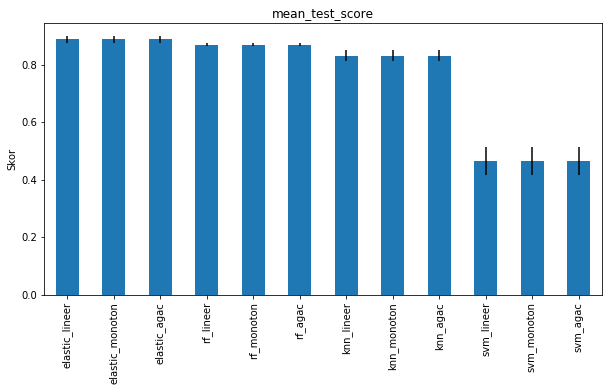

In [141]:
results['mean_test_score'].plot.bar(
    yerr=[results['std_test_score'], results['std_test_score']],
    subplots=True, figsize=(10,5))

plt.ylabel('Skor')
plt.show()

En iyi skorun **elastic net** algoritmasıyla elde edilebildiğini görüyoruz. Ön işleme farklılıkları olan veri setleri arasında ise skorlar açısından herhangi bir fark yok. 

 Verileri işleme sürelerini göz önüne alırsak, değişken uzayını çok büyütmeyen ön işleme yöntemini seçebiliriz. Bu durumda lineer ön işlemede one-hot-encoding yapmamız nedeniyle değişken uzayı ön işleme yöntemlerine göre daha büyük.
 Yine işlem yoğunluğu ve süresi ele alındığında, ağaç ön işlemede veri kesikleştirme ve kodlama işlemleri de bir model ile yapıldığı için, bu daha fazla işlem sayısı dolayısıyla veri büyüdükçe işlem yoğunluğu ve hızı bakımından olumsuz sonuçlarla karşılaşabiliriz.

**Sonuç:** Değişken uzayını büyütmeyen ve işlem yoğunluğu bakımından diğerlerine göre daha az yoğun olan monoton ön işleme ile birlikte elastic net algoritmasıyla modelimizi tamamlayabiliriz.

# 5) Modelin Tamamlanması

In [142]:
#Nihai model
elastic_final = ElasticNet(alpha = 100, l1_ratio = 1, random_state = 42)

In [143]:
#Modelin fit edilmesi
elastic_final.fit(X_train_monoton, y_train)

ElasticNet(alpha=100, l1_ratio=1, random_state=42)

In [148]:
#Değişken katsayıları
elastic_final.coef_

array([ -816.50003844,   758.07229077,     0.        ,  5409.86464568,
         857.80184146,  1997.92088648,  2318.42872139,    67.24056941,
        3771.80643036,  2499.32539718,  -216.63297652,   431.36378072,
        1092.29577485,  -254.63992386, -8701.83442398,  2467.25164916,
        5188.89269288,   912.57657957, -1751.09311002, -2081.41248483,
        5055.18755059,  7573.15380229,  1155.50159389,  -488.47702528,
        9694.10351461,  -434.18841501,  6539.1999894 ,  -766.4326303 ,
        6045.94457142, -3154.23595527,  1587.78566696,   886.02847526,
        4017.26353121,  2719.34597673,    47.47011221,  -428.654458  ,
        5425.55027482,  2408.0901133 ,     0.        , 16744.64285203,
        2653.765543  ,  -302.78577549,  5049.36686856,  4338.36575352,
        2064.95586189,  4791.44777306, 11379.08413829,  -820.49608328,
        5229.01851921,  5127.54649998,   640.17429157,   124.29868321,
        2536.56220738,   656.73038634,  5177.68835479,  2490.7833625 ,
      

In [149]:

isimler_pipeline = Pipeline([
    
    #==Çıkarılacak değişkenler==
    ('cikan_degiskenler', sel.DropFeatures(
        features_to_drop = surekli_cikar + kesikli_cikar + kategorik_cikar
    )),
    
    #==Eksik verilerin doldurulması==
    
    #Eksik verilerin işaretlenmesi
    ('missing_isaret', imp.AddMissingIndicator(
        variables = surekli_missing_ind
    ))
    
]) 

isimler = isimler_pipeline.fit_transform(X_train)
isimler.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Dr

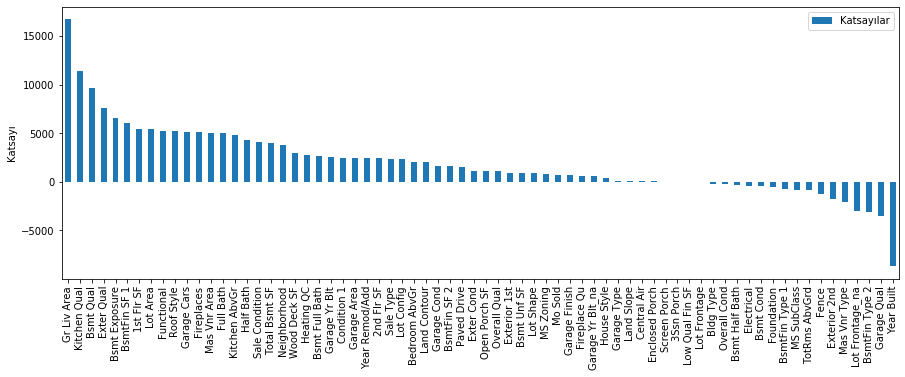

In [150]:
pd.DataFrame({'Katsayılar':elastic_final.coef_}, index=isimler.columns).sort_values(by='Katsayılar',
                                                                                    ascending=False).plot.bar(figsize=(15,5))
plt.ylabel('Katsayı')
plt.show()